<a href="https://colab.research.google.com/github/zeeshanahmad54/test/blob/master/Zeeshan_USC_GRA_Language_Modeling_for_Nutrition_SBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To wrap output text:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
!pip install sentence_transformers
!pip install pyyaml==5.4.1
!pip install umap-learn hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt


# Converting all menu to singular form may help but will interfere with food like 'fries' and 'stir fry'
# import nltk
# nltk.download('omw-1.4')
# from pattern.text.en import singularize

In [ ]:
!gdown --id 1vvv90qSnYqnXJ78kabs_nKvVpwRc8Dip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vvv90qSnYqnXJ78kabs_nKvVpwRc8Dip
To: /content/MenuItem.csv
100% 200k/200k [00:00<00:00, 102MB/s]


In [ ]:
menu_df = pd.read_csv('/content/MenuItem.csv', index_col=None, header=0)

In [ ]:
menu_df.head(10)

,Restaurant Name,Original food Item
0,Coffee Time,garden vegetable sandwich
1,HoSan,roasted seaweed snack
2,Weight Watchers,muffins
3,Natural Sea,albacore tuna solid white
4,World of Beer,caesar salad with grilled flat iron steak
5,Chick-fil-A,honey mustard sauce catering
6,Tai Pei,pork potstickers
7,Port of Subs,top deck meat cheese champion guests
8,YoCream,plain
9,Blimpie,sprite zero


In [ ]:
# menu_df['Original food Item'] = menu_df['Original food Item'].str.replace(',', ' ')
menu_df['Original food Item'] = menu_df['Original food Item'].str.lower()
menu_df['Original food Item'] = menu_df['Original food Item'].str.replace('[^a-zA-Z ]+', '', regex=True)

stopwords = ['oz', 'oz.', 'fl', 'fl.', 'in.', 'inch', 'lb', 'lb.', 'piece', 'serving', 'servings', 'small', 'medium', 'large']
menu_df['Original food Item'] = menu_df['Original food Item'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

# cleaned_concat_menu_df['Original food Item'] = cleaned_concat_menu_df['Original food Item'].str.replace('\d+', '')

In [ ]:
menu_df.head(10)

,Restaurant Name,Original food Item
0,Coffee Time,garden vegetable sandwich
1,HoSan,roasted seaweed snack
2,Weight Watchers,muffins
3,Natural Sea,albacore tuna solid white
4,World of Beer,caesar salad with grilled flat iron steak
5,Chick-fil-A,honey mustard sauce catering
6,Tai Pei,pork potstickers
7,Port of Subs,top deck meat cheese champion guests
8,YoCream,plain
9,Blimpie,sprite zero


In [ ]:
concat_menu_df = menu_df.groupby(['Restaurant Name'])['Original food Item'].apply(' '.join).reset_index()

In [ ]:
# its good to keep words like slice as some pizza restaurants refer to pizza as slices

def preprocess_menu_df(concat_menu_df):
  cleaned_concat_menu_df = concat_menu_df
  cleaned_concat_menu_df['Original food Item'] = cleaned_concat_menu_df['Original food Item'].str.lower()

  stopwords = ['oz', 'oz.', 'fl', 'fl.', 'in.', 'inch', 'lb', 'lb.', 'piece', 'serving', 'servings', 'small', 'medium', 'large']
  cleaned_concat_menu_df['Original food Item'] = cleaned_concat_menu_df['Original food Item'].str.replace('\d+', '')
  cleaned_concat_menu_df['Original food Item'] = cleaned_concat_menu_df['Original food Item'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
  
  return cleaned_concat_menu_df

In [ ]:
concat_menu_df.head()

,Restaurant Name,Original food Item
0,241 Pizza,bacon cheeseburger pizza slice meat lovers piz...
1,A&W (Canada),apple juice bacon egger on sesame seed bun bon...
2,Amay's,almond cookies
3,Ameci Pizza & Pasta,ameci deluxe pizza chicken caesar salad chef s...
4,America's Taco Shop,jack cheese carne asada quesadilla regular tom...


In [ ]:
len(concat_menu_df)

341

In [ ]:
cleaned_concat_menu_df = preprocess_menu_df(concat_menu_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
concat_menu_df.head()

,Restaurant Name,Original food Item
0,241 Pizza,bacon cheeseburger pizza slice meat lovers piz...
1,A&W (Canada),apple juice bacon egger on sesame seed bun bon...
2,Amay's,almond cookies
3,Ameci Pizza & Pasta,ameci deluxe pizza chicken caesar salad chef s...
4,America's Taco Shop,jack cheese carne asada quesadilla regular tom...


In [ ]:
cleaned_concat_menu_df.head()

,Restaurant Name,Original food Item
0,241 Pizza,bacon cheeseburger pizza slice meat lovers piz...
1,A&W (Canada),apple juice bacon egger on sesame seed bun bon...
2,Amay's,almond cookies
3,Ameci Pizza & Pasta,ameci deluxe pizza chicken caesar salad chef s...
4,America's Taco Shop,jack cheese carne asada quesadilla regular tom...


In [ ]:
cleaned_concat_menu_df.head().to_string()

"       Restaurant Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
import torch
torch.cuda.is_available()
dtype = torch.cuda.FloatTensor

In [ ]:
menu_items = list(concat_menu_df['Original food Item'])
# menu_items = list(cleaned_concat_menu_df['Original food Item'])

In [ ]:
model = SentenceTransformer('all-mpnet-base-v2', device='cuda')
# model = SentenceTransformer('stsb-roberta-large', device='cuda') #low quality embeddings according to sbert website

SBERT_menu_items_embeddings = model.encode(menu_items)
menu_items_cos_sim_sbert = util.cos_sim(SBERT_menu_items_embeddings, SBERT_menu_items_embeddings)
print("Cosine-Similarity:", menu_items_cos_sim_sbert)

Cosine-Similarity: tensor([[1.0000, 0.7943, 0.2363,  ..., 0.6434, 0.6854, 0.2898],
        [0.7943, 1.0000, 0.2751,  ..., 0.7143, 0.7991, 0.3390],
        [0.2363, 0.2751, 1.0000,  ..., 0.4304, 0.2824, 0.2404],
        ...,
        [0.6434, 0.7143, 0.4304,  ..., 1.0000, 0.6344, 0.2219],
        [0.6854, 0.7991, 0.2824,  ..., 0.6344, 1.0000, 0.4200],
        [0.2898, 0.3390, 0.2404,  ..., 0.2219, 0.4200, 1.0000]])


In [ ]:
# SimCSE_model = SimCSE("princeton-nlp/sup-simcse-bert-base-uncased")
# cos_sim_menu_items = SimCSE_model.similarity(menu_items, menu_items)

In [ ]:
# SimCSE_menu_items_embeddings = SimCSE_model.encode(menu_items)

341


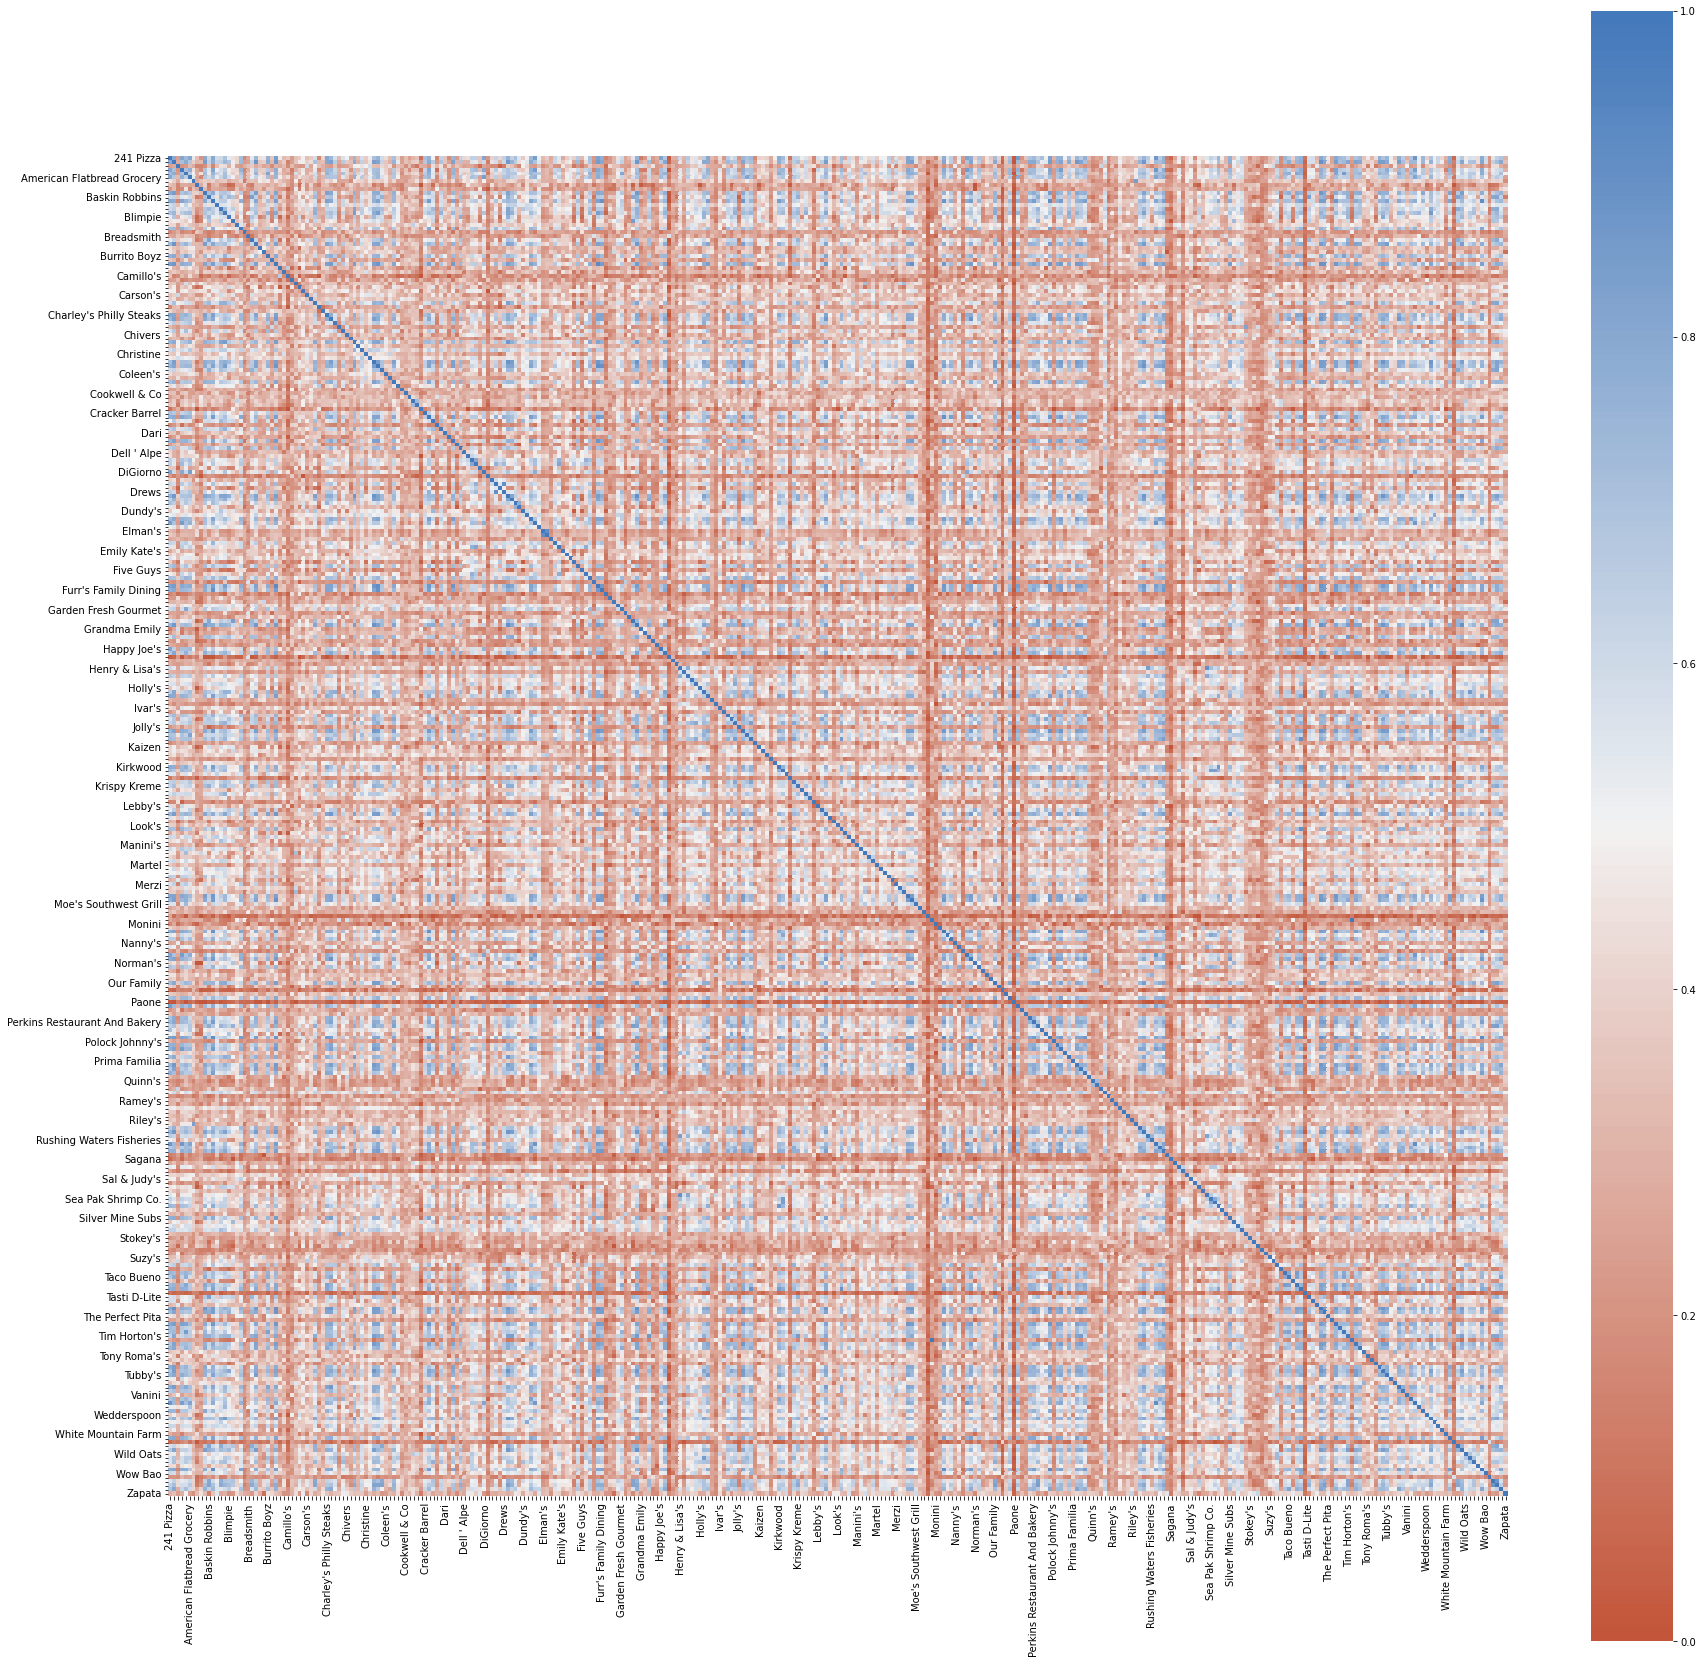

In [ ]:
import seaborn as sns

labels = concat_menu_df['Restaurant Name']
print(len(labels))
fig, ax = plt.subplots(figsize=(30,30))
ax = sns.heatmap(
    menu_items_cos_sim_sbert, 
    vmin=0, vmax=1, center=0.5,
    cmap=sns.diverging_palette(20, 250, n=200),
    # cmap="Blues",
    # annot=True,
    square=True,
    xticklabels=labels,
    yticklabels=labels,
)

# To hide every 5th Label
# for label in ax.xaxis.get_ticklabels()[::5]:
#     label.set_visible(False)
# for label in ax.yaxis.get_ticklabels()[::5]:
#     label.set_visible(False)

# To display every 5th Label
for (i,l) in enumerate(ax.yaxis.get_ticklabels()):
  if i % 5 != 0:
    l.set_visible(False)
for (i,l) in enumerate(ax.xaxis.get_ticklabels()):
  if i % 5 != 0:
    l.set_visible(False)

In [ ]:
import numpy as np
import heapq

num = 4

for idx, row in enumerate(menu_items_cos_sim_sbert):
  top4_sim_restaurants_simcse = heapq.nlargest(4, row)
  print(idx, top4_sim_restaurants_simcse)

top4_sim_restaurants_simcse_idx = np.argpartition(menu_items_cos_sim_sbert, -num, axis=1)[:, -num:]
print(top4_sim_restaurants_simcse_idx)

0 [tensor(1.0000), tensor(0.8766), tensor(0.8690), tensor(0.8498)]
1 [tensor(1.0000), tensor(0.8884), tensor(0.8821), tensor(0.8718)]
2 [tensor(1.0000), tensor(0.6198), tensor(0.6032), tensor(0.5951)]
3 [tensor(1.0000), tensor(0.8702), tensor(0.8504), tensor(0.8499)]
4 [tensor(1.0000), tensor(0.8538), tensor(0.8128), tensor(0.8097)]
5 [tensor(1.0000), tensor(0.8411), tensor(0.8183), tensor(0.8164)]
6 [tensor(1.), tensor(0.8333), tensor(0.5777), tensor(0.5463)]
7 [tensor(1.0000), tensor(0.4679), tensor(0.4658), tensor(0.4451)]
8 [tensor(1.0000), tensor(0.6178), tensor(0.5215), tensor(0.5203)]
9 [tensor(1.0000), tensor(0.8679), tensor(0.8622), tensor(0.8422)]
10 [tensor(1.0000), tensor(0.8297), tensor(0.8285), tensor(0.8194)]
11 [tensor(1.0000), tensor(0.9108), tensor(0.9056), tensor(0.8891)]
12 [tensor(1.0000), tensor(0.6819), tensor(0.6802), tensor(0.6515)]
13 [tensor(1.0000), tensor(0.8170), tensor(0.8047), tensor(0.7910)]
14 [tensor(1.0000), tensor(0.8559), tensor(0.8470), tensor(0.8

In [ ]:
# Delete the instances of the index in sim matrix if it matches with row index
# global_bot_sim_mat = [[x for x in global_bot_sim_mat_orig[row] if x != row] for row in range(len(global_bot_sim_mat_orig))]

for idx, row in enumerate(top4_sim_restaurants_simcse_idx):
  print(f"Restaurant {idx}: {concat_menu_df['Restaurant Name'].iloc[idx]}, Menu: {concat_menu_df['Original food Item'].iloc[idx]}")
  print("\n")
  for rest_idx, rest in enumerate(row.tolist()[::-1]):
    print(f"Sim {rest_idx}, Restaurant: {concat_menu_df['Restaurant Name'].iloc[rest]}, Menu: {concat_menu_df['Original food Item'].iloc[rest]}\n")
    # print(concat_menu_df['Restaurant Name'].iloc[rest], concat_menu_df['Original food Item'].iloc[rest])
  print("\n")

Restaurant 0: 241 Pizza, Menu: bacon cheeseburger pizza slice meat lovers pizza slice bbq chicken pizza slice meat lovers pizza slice garlic bread with cheese ranch dipping sauce cauliflower pizza crust meat lovers pizza slice potato wedges pepperoni plant based pizza slice chicken club pizza slice chorizo supreme pizza slice chorizo supreme pizza slice pepperoni pizza slice pepperoni pizza slice jalapeno hawaiian pizza slice pepperoni plant based pizza slice bbq wings hawaiian pizza slice basil pesto pizza slice canadian pizza slice canadian supreme plant based pizza slice hawaiian pizza slice canadian supreme plant based pizza slice bacon cheeseburger pizza slice veggie sensation pizza slice spicy buffalo dipping sauce jalapeno hawaiian pizza slice veggie sensation pizza slice pepperoni pizza slice basil pesto pizza slice hot wings chicken club pizza slice gravy deluxe pizza slice bbq dipping sauce poutine cheese pizza slice canadian supreme plant based pizza slice garden salad hawai

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from __future__ import print_function
import time
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


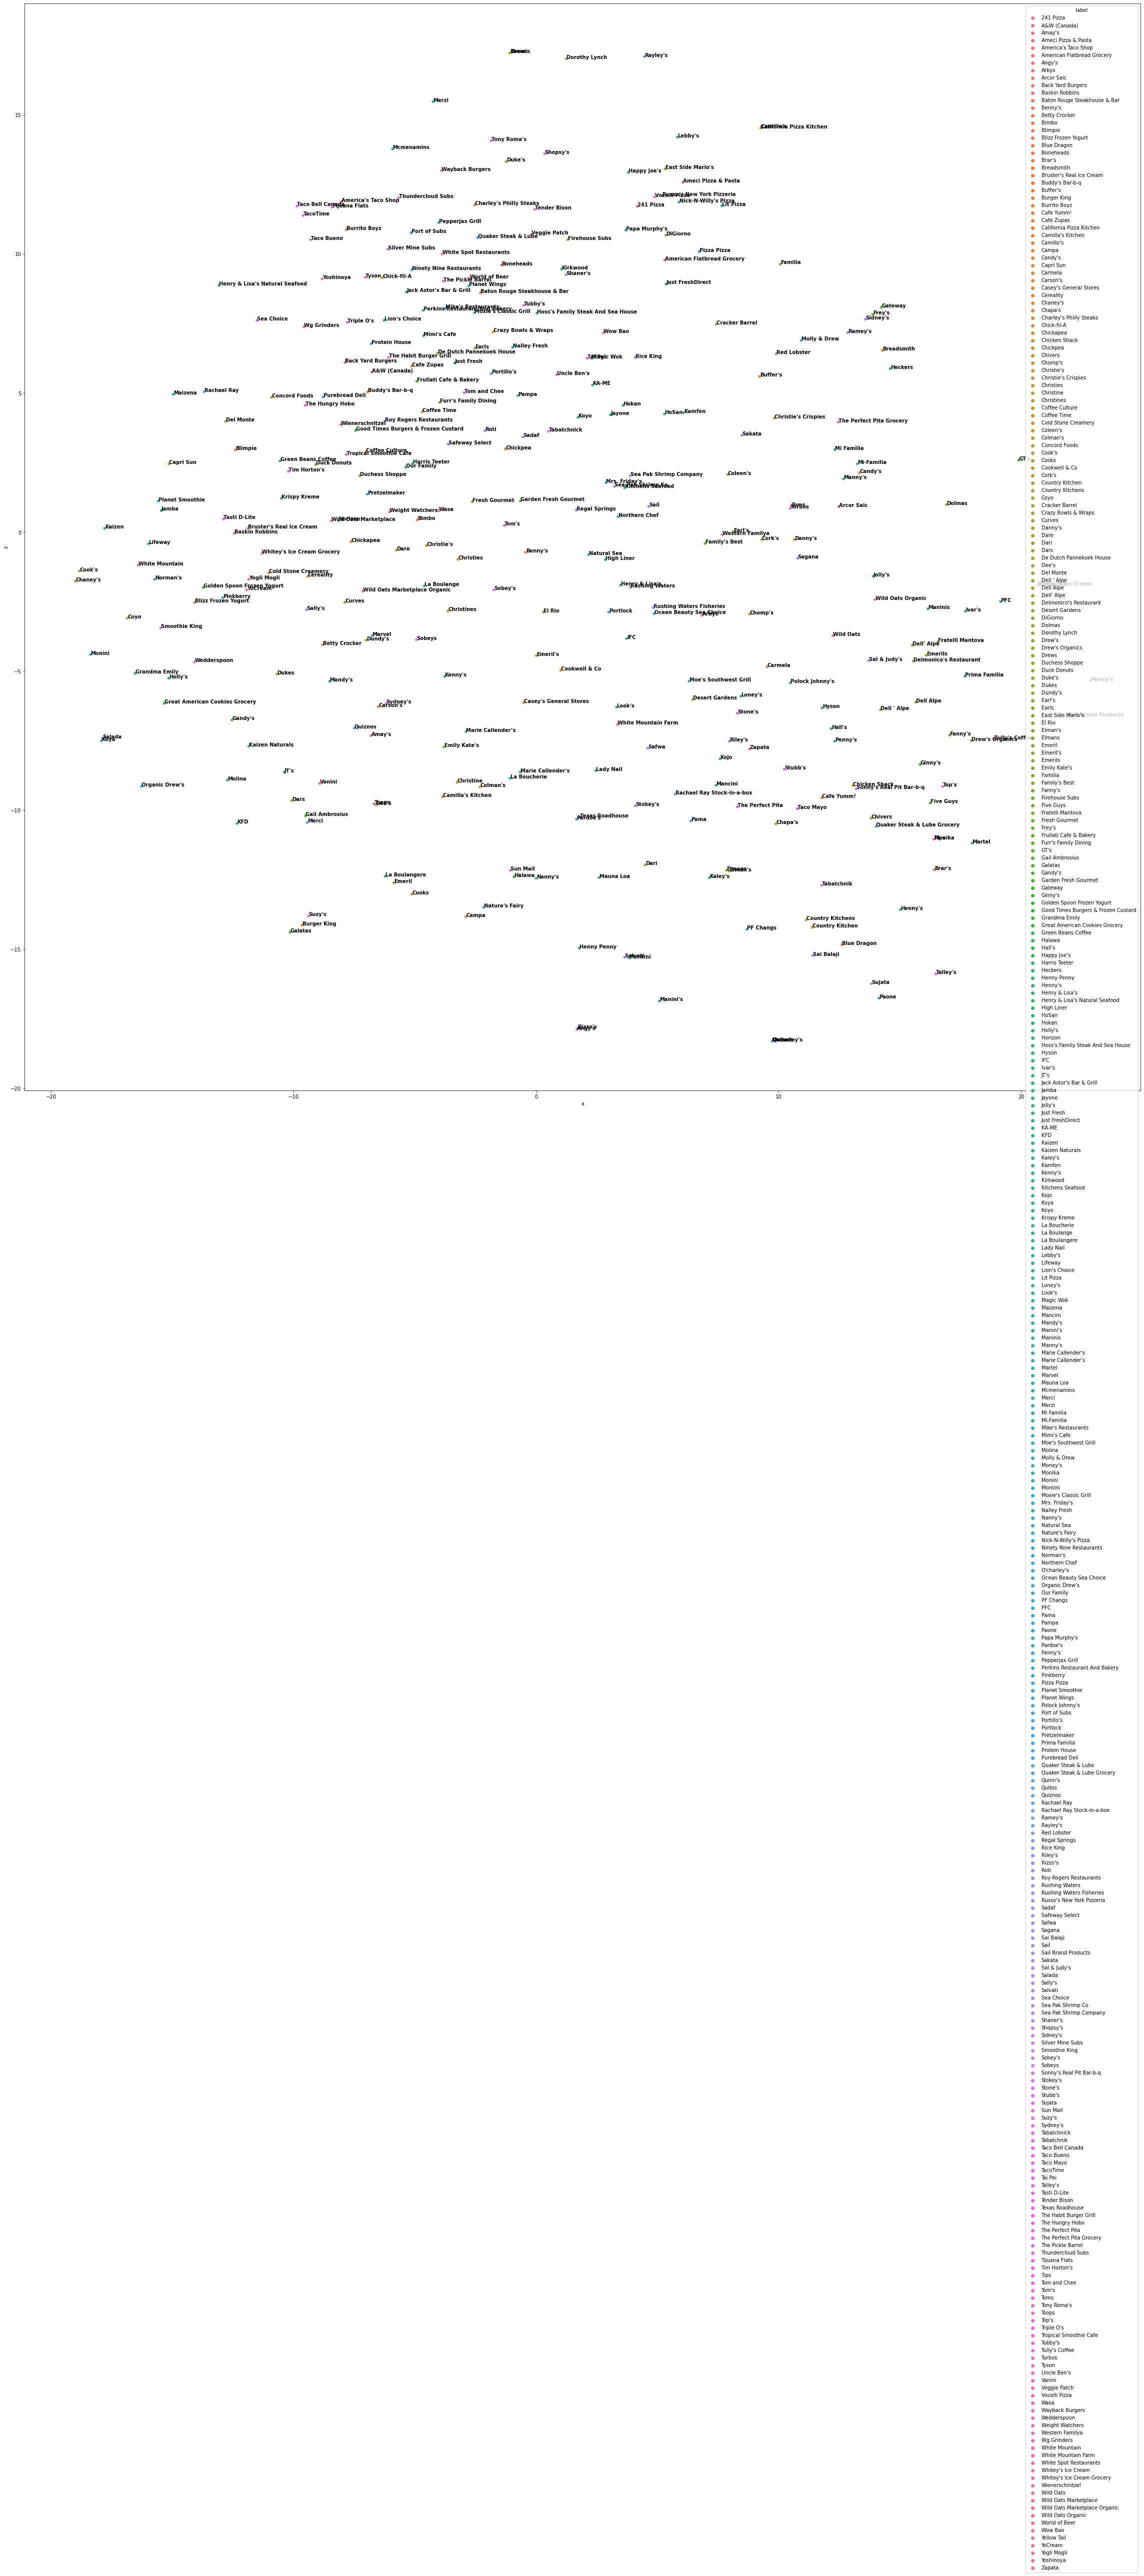

In [ ]:
dim_reducer = TSNE(n_components=2)
fig = plt.figure(figsize=(40,40))
# ax = fig.add_subplot(4,4,1)

ys = concat_menu_df['Restaurant Name'].to_numpy().reshape(-1)
dim_reduced_vectors = dim_reducer.fit_transform(SBERT_menu_items_embeddings)
df = pd.DataFrame.from_dict({'x':dim_reduced_vectors[:,0],'y':dim_reduced_vectors[:,1],'label':ys})

p1 = sns.scatterplot(data=df,x='x',y='y',hue='label', legend="full")#,ax=ax)

for line in range(0,df.shape[0]):
     p1.text(df.x[line]+0.01, df.y[line], df.label[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(SBERT_menu_items_embeddings)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 341 samples in 0.001s...
[t-SNE] Computed neighbors for 341 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 341 / 341
[t-SNE] Mean sigma: 0.293688
[t-SNE] KL divergence after 250 iterations with early exaggeration: 129.654129
[t-SNE] KL divergence after 500 iterations: 2.852982
t-SNE done! Time elapsed: 2.979841709136963 seconds


## 3D similarity plot - 1

In [ ]:
# tsne_plot_labels = np.asarray([idx for idx in range(len(concat_menu_df))]).reshape(-1)

# df_tsne = pd.DataFrame.from_dict({'x':tsne_results[:,0],'y':tsne_results[:,1],'z':tsne_results[:,2], 'label':tsne_plot_labels})

# ax = plt.figure(figsize=(32,20)).gca(projection='3d')
# p2 = ax.scatter(
#     xs=df_tsne["x"], 
#     ys=df_tsne["y"], 
#     zs=df_tsne["z"],
#     c=df_tsne["label"], 
#     cmap='tab10'
# )
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# plt.xlim(-20,20)
# plt.ylim(-20,20)

# # for line in range(0,df.shape[0]):
# #   p2.text(df_tsne.x[line]+0.01, df_tsne.y[line]+0.01, df_tsne.label[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
  
# # for i, txt in enumerate(df_tsne['label']):
# #     ax.annotate(txt, (df_tsne["x"][i], df_tsne["y"][i]))

# plt.show()

# # plt.figure(figsize=(16,10))
# # sns.scatterplot(
# #     x="x", y="y",
# #     hue="label",
# #     palette=sns.color_palette("hls", as_cmap = True),
# #     data=df_tsne,
# #     legend="full",
# #     alpha=0.5
# # )

## 3D similarity plot - 2

In [ ]:
import plotly.express as px

tsne_plot_labels = concat_menu_df['Restaurant Name'].to_numpy().reshape(-1)
print(len(tsne_plot_labels))
df_tsne = pd.DataFrame.from_dict({'x':tsne_results[:,0],'y':tsne_results[:,1],'z':tsne_results[:,2], 'label':tsne_plot_labels})
print(len(tsne_results), len(df_tsne))

fig = px.scatter_3d(df_tsne, x='x', y='y', z='z',
              color='label', text='label', range_x=[-100,100], range_y=[-100,100], range_z=[-100,100], width=2000, height=2000)
fig.update_traces(marker_size = 2)

fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


341
341 341


## Clustering

In [ ]:
import umap   
# SimCSE_menu_items_embeddings_umap_embeddings = umap.UMAP(n_neighbors=15,
SBERT_menu_items_embeddings_umap_embeddings = umap.UMAP(n_neighbors=5, 
                            n_components=5, 
                            metric='cosine').fit_transform(SBERT_menu_items_embeddings)

In [ ]:
import hdbscan
# SimCSE_menu_items_embeddings_cluster = hdbscan.HDBSCAN(min_cluster_size=15,
SBERT_menu_items_embeddings_cluster = hdbscan.HDBSCAN(min_cluster_size=10,
                          min_samples = 2,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(SBERT_menu_items_embeddings_umap_embeddings)

SBERT_menu_items_embeddings_cluster.labels_

array([ 1,  6,  9,  1,  5,  1,  2,  0,  5,  6,  8,  6,  5,  9,  9,  8,  8,
        6,  6,  2, -1,  8,  6,  9, -1,  5,  4,  6,  1, -1,  1,  3,  5,  8,
        6,  9, -1,  9,  8,  4,  6,  6,  9,  4,  6,  4,  5,  9,  9,  9, -1,
        9,  9,  6,  8, -1, -1,  8,  9,  3,  6,  5,  6,  6,  8,  9,  6,  7,
        5,  9,  6,  8,  6,  7,  7,  2,  2,  2,  2,  5,  1,  3, -1,  6,  2,
        6,  9,  9,  6,  6,  7,  5,  6,  1,  5,  4,  4, -1,  6,  2, -1,  7,
        5,  2,  6,  2,  2,  9, -1,  6,  6,  8,  8, -1,  8,  5, -1,  2,  8,
        9,  8,  8,  9,  3,  4,  1,  7, -1,  2,  2,  0,  0,  0,  6,  6,  8,
        9,  6,  4,  0,  2,  8,  6,  8,  6, -1,  6,  9,  6, -1,  8,  8,  4,
        6,  9,  6,  0,  4,  8,  6,  9, -1,  9, -1,  3,  1,  8,  6,  1,  4,
       -1,  6,  7,  4,  9, -1,  2,  5, -1, -1,  2,  7,  6,  6,  8,  6,  5,
        5,  6,  6,  5,  8, -1,  1,  2,  8, -1,  6,  0,  6,  3,  0,  3,  1,
        6,  8,  0, -1,  0, -1,  7, -1,  2,  4,  6,  6,  1,  3,  4,  6,  6,
        8,  1,  8,  6,  2

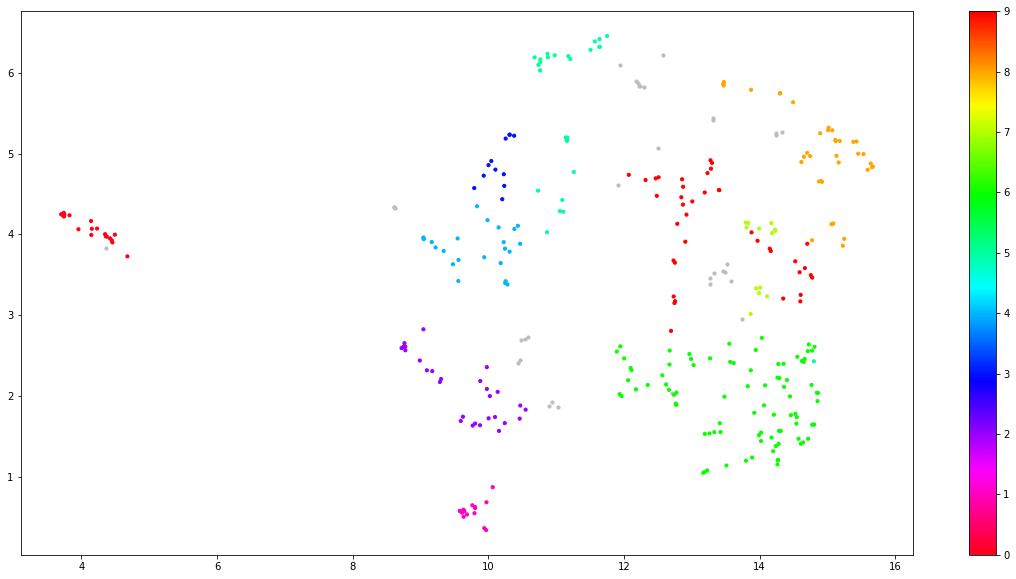

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=5, n_components=2, min_dist=0.0, metric='cosine').fit_transform(SBERT_menu_items_embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = SBERT_menu_items_embeddings_cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=10)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=10, cmap='hsv_r')
plt.colorbar()

In [ ]:
topic_mod_menu_df = pd.DataFrame(concat_menu_df, columns=['Restaurant Name', 'Original food Item'])
topic_mod_menu_df['Topic'] = SBERT_menu_items_embeddings_cluster.labels_
topic_mod_menu_df['Desc_ID'] = range(len(topic_mod_menu_df))
desc_per_topic = topic_mod_menu_df.groupby(['Topic'], as_index = False).agg({'Original food Item': ' '.join})

In [ ]:
topic_mod_menu_df

,Restaurant Name,Original food Item,Topic,Desc_ID
0,241 Pizza,bacon cheeseburger pizza slice meat lovers piz...,1,0
1,A&W (Canada),apple juice bacon egger on sesame seed bun bon...,6,1
2,Amay's,almond cookies,9,2
3,Ameci Pizza & Pasta,ameci deluxe pizza chicken caesar salad chef s...,1,3
4,America's Taco Shop,jack cheese carne asada quesadilla regular tom...,5,4
...,...,...,...,...
336,Yellow Tail,moscato pinot grigio,2,336
337,YoCream,plain very strawberry pistachio gelato silk al...,8,337
338,Yogli Mogli,carrot cake pumpkin cookies n cream mango tang...,8,338
339,Yoshinoya,no calorie brisk green tea with peach grilled ...,5,339


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [ ]:
tf_idf, count = c_tf_idf(desc_per_topic['Original food Item'].values, m=len(concat_menu_df))

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     ['Original food Item']
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Original food Item": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, desc_per_topic, n=20)
topic_sizes = extract_topic_sizes(topic_mod_menu_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
topic_sizes

,Topic,Size
7,6,88
10,9,39
9,8,38
0,-1,35
3,2,28
6,5,28
5,4,24
1,0,20
2,1,16
8,7,13


In [ ]:
top_n_words

{-1: [('bread', 0.10188062557298021),
  ('rye', 0.08402102331304225),
  ('pie', 0.0666104499269471),
  ('style', 0.06292093554074239),
  ('home', 0.057231849474964396),
  ('chia', 0.05117048852557197),
  ('belgian', 0.05117048852557197),
  ('artisan', 0.05117048852557197),
  ('pot', 0.0480604120666338),
  ('grated', 0.0480604120666338),
  ('free', 0.041737069285330296),
  ('salsa', 0.04112506396668954),
  ('waffles', 0.04056692903355331),
  ('olive', 0.03929359891834916),
  ('flour', 0.038154566316642935),
  ('cheesecake', 0.038154566316642935),
  ('oil', 0.03618352245941099),
  ('new', 0.03618352245941099),
  ('pomegranate', 0.03451702862344063),
  ('cattle', 0.03152368906639739)],
 0: [('shrimp', 0.14589613398634851),
  ('salmon', 0.13864179958809633),
  ('cod', 0.10572073451555025),
  ('wild', 0.10366411835072196),
  ('fillets', 0.07623785881781474),
  ('tilapia', 0.0686001695017016),
  ('breaded', 0.06824817763083736),
  ('butterfly', 0.06483699240783898),
  ('pacific', 0.058751201